In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from collections import Counter
import numpy as np

import seaborn as sns

In [19]:
import sklearn

sklearn.__version__

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
data = df[['Pregnancies', 'Insulin', 'BMI', 'Age']]

In [4]:
targets = df['Outcome']

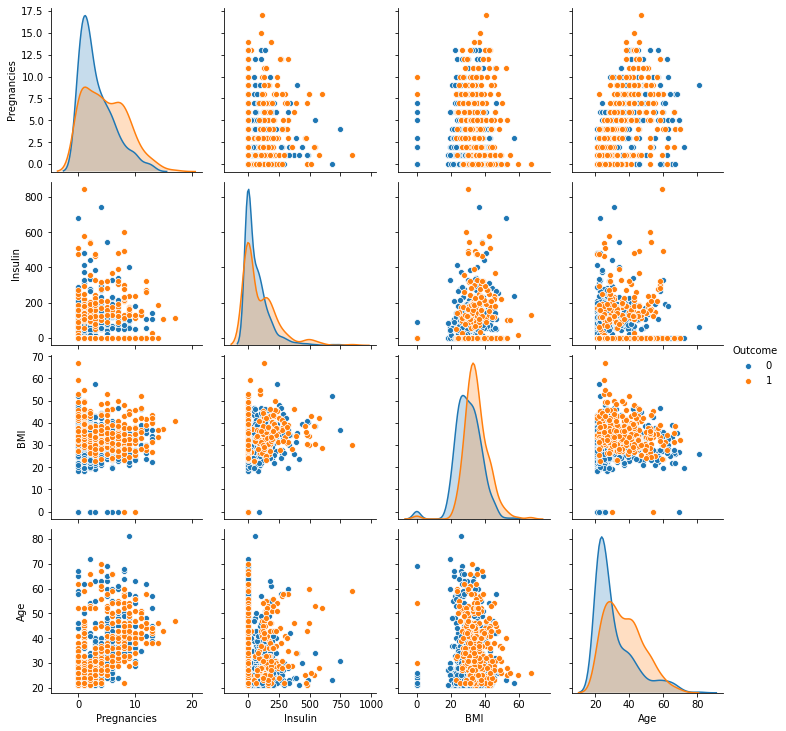

In [5]:
sns.pairplot(df[['Pregnancies', 'Insulin', 'BMI', 'Age', 'Outcome']], hue='Outcome')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(data), targets, test_size=0.25, random_state=1)

In [7]:
lr = LogisticRegression(max_iter=10000)

In [8]:
targets.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr.intercept_

array([-3.04337232])

In [11]:
y_pred = lr.predict(X_test)

In [12]:
Counter(y_pred)

Counter({0: 157, 1: 35})

In [13]:
Counter(y_test)

Counter({0: 123, 1: 69})

In [14]:
np.mean(y_test == y_pred)

0.6875

In [15]:
confusion_matrix(y_test, y_pred)

array([[110,  13],
       [ 47,  22]])

In [16]:
a = np.concatenate([[['Actual: 0    ', 'Actual: 1    ']], confusion_matrix(y_test, y_pred).T], axis=0).T

In [17]:
a

array([['Actual: 0    ', '110', '13'],
       ['Actual: 1    ', '47', '22']], dtype='<U21')

In [18]:
np.concatenate([[['   ', 'Predicted: 0', 'Predicted: 1']], a])

array([['   ', 'Predicted: 0', 'Predicted: 1'],
       ['Actual: 0    ', '110', '13'],
       ['Actual: 1    ', '47', '22']], dtype='<U21')